In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import xgboost as xgb
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer, f1_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.dummy import DummyClassifier


In [2]:
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(',', ' '))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
db_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'data_cpv.csv')
data = pd.read_csv(db_path)

In [3]:
data = data[data['montant'] <= 29999999]

In [39]:
data.columns

Index(['uid', 'id', 'nature', 'acheteur_id', 'acheteur_nom', 'acheteur_siren',
       'titulaire_id', 'titulaire_typeIdentifiant', 'titulaire_nom',
       'titulaire_siren', 'objet', 'montant', 'codeCPV', 'procedure',
       'dureeMois', 'dateNotification', 'datePublicationDonnees', 'formePrix',
       'attributionAvance', 'offresRecues', 'marcheInnovant', 'ccag',
       'sousTraitanceDeclaree', 'typeGroupementOperateurs', 'tauxAvance',
       'origineUE', 'origineFrance', 'lieuExecution_code',
       'lieuExecution_typeCode', 'idAccordCadre', 'source_open_data',
       'codeCPV_FR', 'codeCPV_2', 'codeCPV_3', 'codeCPV_4', 'codeCPV_5'],
      dtype='object')

In [62]:
X = data[['codeCPV_2']]
y = data.montant

In [63]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(X[['codeCPV_2']])
X[ohe.get_feature_names_out()] = ohe.transform(X[['codeCPV_2']])

/tmp/ipykernel_167897/3779389665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ohe.get_feature_names_out()] = ohe.transform(X[['codeCPV_2']])
/tmp/ipykernel_167897/3779389665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ohe.get_feature_names_out()] = ohe.transform(X[['codeCPV_2']])
/tmp/ipykernel_167897/3779389665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [64]:
X = X.drop(columns=['codeCPV_2'])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# XGB Regressor

In [17]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [18]:
y_pred = model.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mae

2915033.8872048

# Do it again, with code CPV 3

In [21]:
X3 = data[['codeCPV_3']]
y = data.montant

In [22]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(X3[['codeCPV_3']])
X3[ohe.get_feature_names_out()] = ohe.transform(X3[['codeCPV_3']])

/tmp/ipykernel_167897/1313229836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3[ohe.get_feature_names_out()] = ohe.transform(X3[['codeCPV_3']])
/tmp/ipykernel_167897/1313229836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3[ohe.get_feature_names_out()] = ohe.transform(X3[['codeCPV_3']])
/tmp/ipykernel_167897/1313229836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [23]:
X3 = X3.drop(columns=['codeCPV_3'])

In [24]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2)

In [44]:

model = xgb.XGBRegressor(
    n_estimators=1000,        # More trees since you have enough data
    learning_rate=0.05,       # Slower learning, better generalization
    max_depth=6,              # Balanced depth
    subsample=0.8,            # Prevent overfitting
    colsample_bytree=0.8,     # Same
    reg_alpha=0.1,            # L1 regularization
    reg_lambda=1.0,           # L2 regularization
    min_child_weight=5,       # Minimum weight in child nodes — helps smooth splits
    n_jobs=-1,                # Use all cores
    random_state=42,
    verbosity=1
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [31]:
y_pred3 = model3.predict(X3_test)
mae3 = mean_absolute_error(y_test, y_pred3)
mae3

2731156.0635530045

In [29]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [200, 500, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 10]
}

search = RandomizedSearchCV(
    xgb.XGBRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

In [45]:
print("Mean cost:", y_train.mean())
print("Median cost:", np.median(y_train))

Mean cost: 743703.8052739836
Median cost: 155225.19


In [46]:
# Log transform the targets
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Fit model on log-transformed cost
model.fit(X_train, y_train_log)

# Predict and revert
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Evaluate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE (log-transformed target):", mae)

MAE (log-transformed target): 663243.390021741


In [47]:
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

MAPE: 583.5788962218223


In [48]:
# Training with log1p
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

model.fit(X_train, y_train_log)

# Predict and reverse the log
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

MAE: 663243.390021741
MAPE: 583.5788962218223


In [51]:
data

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,titulaire_nom,titulaire_siren,...,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data,codeCPV_FR,codeCPV_2,codeCPV_3,codeCPV_4,codeCPV_5
0,2154005160001320242024-LOT04,20242024-LOT04,Marché,21540051600013,COMMUNE DE BATILLY,215 400 516,78885470100018,SIRET,ACOMETAL,788 854 701,...,NaN,54980,Code postal,NaN,data.gouv.fr decp-2024.json,Travaux de charpente,45000000,45200000,45260000,45261000
1,243500667002882021M226MO,2021M226MO,Marché,24350066700288,CC VAL D'ILLE-AUBIGNE,243 500 667,38373211200032,SIRET,UNIVERS,383 732 112,...,NaN,35520,Code postal,NaN,data.gouv.fr decp-2024.json,Services d'architecture,71000000,71200000,71200000,71200000
2,249710047000472024SS_PRD_TRV,2024SS_PRD_TRV,Marché,24971004700047,COMMUNAUTE DE COMMUNES DE MARIE GALANTE,249 710 047,43387249600016,SIRET,COTRAM B.T.P.,433 872 496,...,NaN,97112,Code postal,NaN,data.gouv.fr decp-2024.json,Travaux de construction de stations d'épuratio...,45000000,45200000,45230000,45232000
3,6254801990001124-0806-L2,24-0806-L2,Marché,62548019900011,"LA MAISON POUR TOUS, SOCIETE ANONYME COOPERATI...",625 480 199,55204695502544,SIRET,ENGIE ENERGIE SERVICES,552 046 955,...,NaN,39,Code département,NaN,data.gouv.fr decp-2024.json,Services de réparation et d'entretien de chauf...,50000000,50700000,50720000,50720000
4,20002563300013202424011BCR,202424011BCR,Marché,20002563300013,SI DE RESTAURATION COLLECTIVE,200 025 633,47698032100238,SIRET,POMONA EPISAVEURS,476 980 321,...,0,45800,Code postal,NaN,data.gouv.fr decp-2025-04.json,Produits alimentaires divers,15000000,15800000,15800000,15800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299665,243000643000452024240072,2024240072,Marché,24300064300045,COMMUNAUTE AGGLO NIMES METROPOLE,243 000 643,79386502300055,SIRET,SERVICES MAINTENANCE ENERGIES,793 865 023,...,NaN,30947,Code postal,NaN,data.gouv.fr decp-2024.json,Services de réparation et d'entretien de chaud...,50000000,50500000,50530000,50531000
299666,2133016250001720230231110,20230231110,Marché,21330162500017,COMMUNE D'EYSINES,213 301 625,44010434700032,SIRET,L.T.B. AQUITAINE,440 104 347,...,NaN,33320,Code postal,NaN,data.gouv.fr decp-2024.json,Travaux de peinture,45000000,45400000,45440000,45442000
299667,25440109400068202323_006_02,202323_006_02,Marché,25440109400068,SYNDICAT MIXTE ATLANTIC'EAU,254 401 094,42856174000138,SIRET,CISE TP,428 561 740,...,NaN,44100,Code postal,NaN,data.gouv.fr decp-2024.json,Travaux relatifs aux conduites d'alimentation ...,45000000,45200000,45230000,45232000
299668,219711132000152022I772-4,2022I772-4,Marché,21971113200015,COMMUNE DU GOSIER,219 711 132,41347003000029,SIRET,SOCIETE GUADELOUPEENNE DE TRAVAUX D'ENVIRONNEMENT,413 470 030,...,0,97190,Code postal,NaN,data.gouv.fr decp-2025-01.json,Location de faucheuses ou de matériel agricole...,77000000,77100000,77110000,77112000


In [67]:
data = data[data['codeCPV_2'].isin(data.groupby('codeCPV_2').size().nlargest(30).index)]

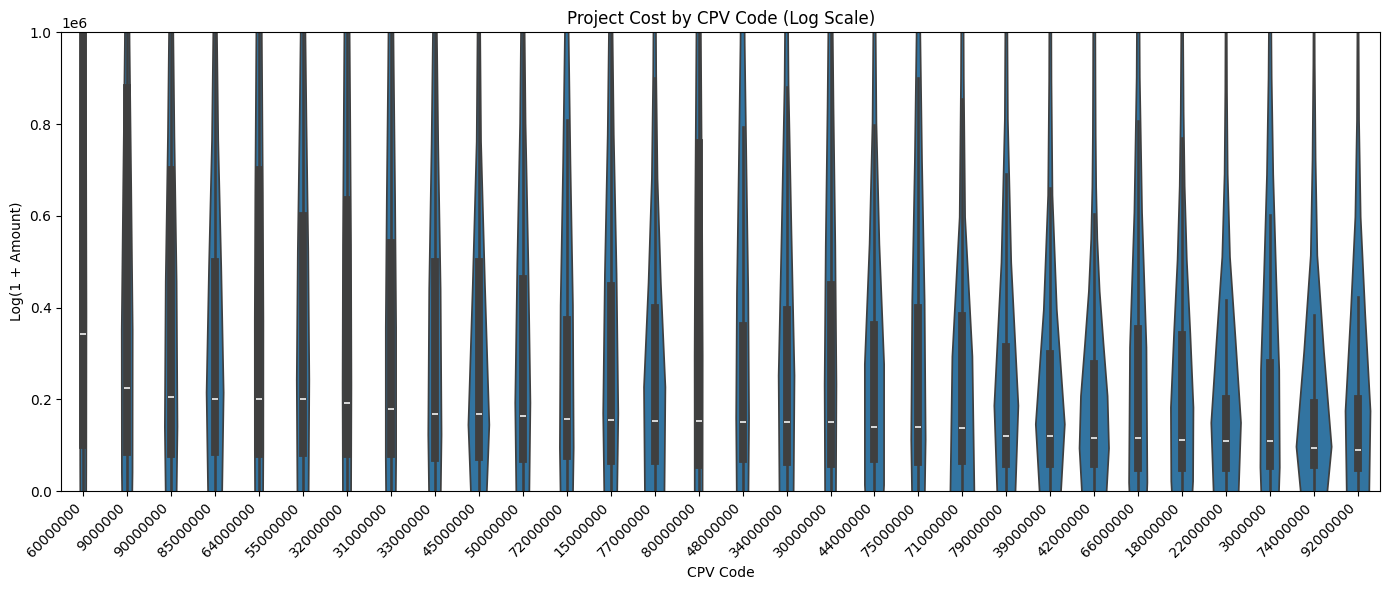

In [74]:
# Optional: reduce extreme skew for visualization


# Plot (sorted by median amount)
order = data.groupby('codeCPV_2')['montant'].median().sort_values(ascending=False).index

plt.figure(figsize=(14, 6))
sns.violinplot(data=data, x='codeCPV_2', y='montant', order=order)

plt.xticks(rotation=45, ha='right')
plt.title('Project Cost by CPV Code (Log Scale)')
plt.ylabel('Log(1 + Amount)')
plt.xlabel('CPV Code')
plt.ylim(0, 1000000)
plt.tight_layout()
plt.show()

In [59]:
y_pred = model.predict(X_test)

# Add to your test DataFrame
data['predicted_montant'] = y_pred
data['error'] = abs(data['montant'] - data['predicted_montant'])

ValueError: Length of values (59476) does not match length of index (286497)